In [116]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [124]:
results = pd.read_csv('f1/results.csv')
races = pd.read_csv('f1/races.csv')

In [180]:
print(results.dtypes,'\n\n',races.dtypes)

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object 

 raceId        int64
year          int64
round         int64
circuitId     int64
name         object
date         object
time         object
url          object
dtype: object


In [122]:
#results.isnull().sum()
#results['year'].isnull.sum()

In [55]:
df = results.dropna(subset = ['positionOrder','grid']).copy()

In [57]:
df['podium'] = (df['positionOrder']<=3).astype(int)

In [59]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,podium
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1,0
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1,0


In [65]:
grid_podium_rate = df.groupby('grid')['podium'].mean() 

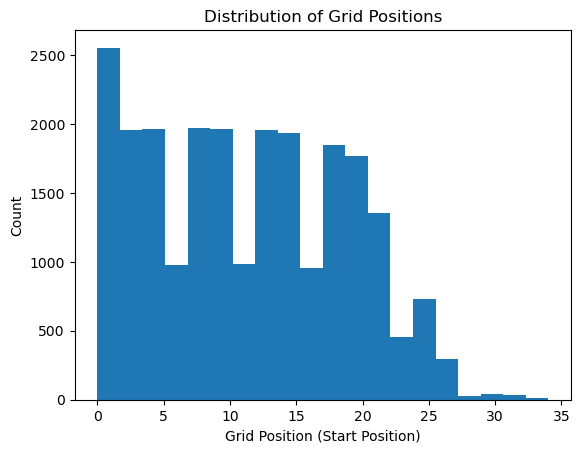

In [182]:
plt.figure()
plt.hist(df['grid'],bins=20)
plt.xlabel("Grid Position (Start Position)")
plt.ylabel("Count")
plt.title("Distribution of Grid Positions")
plt.show()

**The dips you see at P6, P11, and P16 are primarily caused by the subsequent application of grid penalties.**

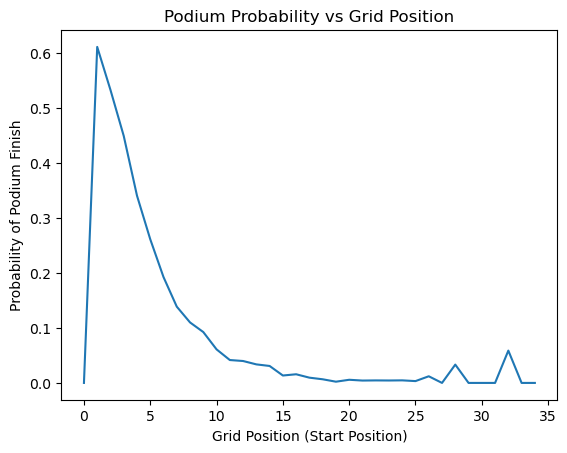

In [83]:
plt.figure()
plt.plot(grid_podium_rate.index, grid_podium_rate.values)
plt.xlabel("Grid Position (Start Position)")
plt.ylabel("Probability of Podium Finish")
plt.title("Podium Probability vs Grid Position")
plt.show()

**The graph showing data up to Grid Position 35 suggests that the analysis includes data from a historical period where F1 (or related racing series) had:<br><hr>
1.More than 20 cars in a race.<br>
2.Failed qualifying attempts or non-starters who were still assigned a theoretical grid position number.**

In [99]:
print("Top 20 Grid Positions Podium Probability:")
print(grid_podium_rate.head(20))

Top 20 Grid Positions Podium Probability:
grid
0     0.000000
1     0.611562
2     0.533265
3     0.449541
4     0.340793
5     0.261445
6     0.192623
7     0.138804
8     0.110092
9     0.092574
10    0.061038
11    0.041667
12    0.039877
13    0.033742
14    0.030864
15    0.013485
16    0.015756
17    0.009574
18    0.006630
19    0.002245
Name: podium, dtype: float64


# **if player starts from grid 1 the chances of him winning the race are ~61%**








# 1. logistic regression

In [114]:
X = df[['grid']]
y = df['podium']

X_train,X_test,y_train,y_test = train_test_split(X,y)
LGR = LogisticRegression()
LGR.fit(X_train,y_train)

y_pred = LGR.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8788898233809924

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      5225
           1       0.00      0.00      0.00       720

    accuracy                           0.88      5945
   macro avg       0.44      0.50      0.47      5945
weighted avg       0.77      0.88      0.82      5945


Confusion Matrix:
 [[5225    0]
 [ 720    0]]


C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
merged = df.merge(
    races[['raceId','year']],
    on = 'raceId',
    how = 'left'
)

# 2. **RandomForest**

In [162]:
X = merged[['grid','constructorId','year']]
y = merged['podium']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2
)

rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [163]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.881623212783852

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      4172
           1       0.52      0.42      0.47       584

    accuracy                           0.88      4756
   macro avg       0.72      0.68      0.70      4756
weighted avg       0.87      0.88      0.88      4756


Confusion Matrix:
 [[3948  224]
 [ 339  245]]
